# Klasifikacija

Za početak ćemo dodati biblioteke za rad sa podacima i učitati sređeni skup podataka.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns=30

In [2]:
banks=pd.read_csv('Bank Marketing/prepared_bank.csv')

In [3]:
banks.head(10)

,age,job,education,housing,loan,winter,spring,summer,autumn,cellular,telephone,anxiety,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,nr_employed,euribor3m,divorced,married,single,subscribed?
0,30,0,2,True,False,0,1,0,0,1,0,4,487.000000,2.0,False,False,-1.8,92.893,-46.2,5099.1,1.313,0,1,0,False
1,39,1,3,False,False,0,1,0,0,0,1,4,346.000000,4.0,False,False,1.1,93.994,-36.4,5191.0,4.855,0,0,1,False
2,25,1,3,True,False,0,0,1,0,0,1,2,227.000000,1.0,False,False,1.4,94.465,-41.8,5228.1,4.962,0,1,0,False
3,47,2,5,True,False,1,0,0,0,1,0,0,58.000000,1.0,False,False,-0.1,93.200,-42.0,5195.8,4.191,0,1,0,False
4,32,1,5,False,False,0,0,0,1,1,0,3,128.000000,3.0,False,True,-1.1,94.199,-37.5,4963.6,0.884,0,0,1,False
5,32,2,5,True,False,0,0,0,1,1,0,0,290.000000,4.0,False,False,-1.1,94.199,-37.5,4963.6,0.879,0,0,1,False
6,41,2,5,True,False,1,0,0,0,1,0,0,44.000000,2.0,False,False,-0.1,93.200,-42.0,5195.8,4.191,0,1,0,False
7,31,1,4,False,False,1,0,0,0,1,0,1,68.000000,1.0,False,True,-0.1,93.200,-42.0,5195.8,4.153,1,0,0,False
8,35,0,2,False,False,0,1,0,0,0,1,3,256.974477,1.0,False,False,1.1,93.994,-36.4,5191.0,4.855,0,1,0,False
9,25,1,1,True,False,0,0,1,0,1,0,3,301.000000,1.0,False,False,1.4,93.918,-42.7,5228.1,4.958,0,0,1,False


In [4]:
banks.dtypes

age                 int64
job                 int64
education           int64
housing              bool
loan                 bool
winter              int64
spring              int64
summer              int64
autumn              int64
cellular            int64
telephone           int64
anxiety             int64
duration          float64
campaign          float64
pdays                bool
previous             bool
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
nr_employed       float64
euribor3m         float64
divorced            int64
married             int64
single              int64
subscribed?          bool
dtype: object

In [5]:
banks=banks.dropna()

Nakon dorade podataka vreme je da podelimo skup u dva dela, ulazne podatke (X) i izlazne podatke (y).

In [6]:
X=banks.drop('subscribed?', axis=1)
y=banks['subscribed?']

In [7]:
y.head()

0    False
1    False
2    False
3    False
4    False
Name: subscribed?, dtype: bool

In [8]:
X.head()

,age,job,education,housing,loan,winter,spring,summer,autumn,cellular,telephone,anxiety,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,nr_employed,euribor3m,divorced,married,single
0,30,0,2,True,False,0,1,0,0,1,0,4,487.0,2.0,False,False,-1.8,92.893,-46.2,5099.1,1.313,0,1,0
1,39,1,3,False,False,0,1,0,0,0,1,4,346.0,4.0,False,False,1.1,93.994,-36.4,5191.0,4.855,0,0,1
2,25,1,3,True,False,0,0,1,0,0,1,2,227.0,1.0,False,False,1.4,94.465,-41.8,5228.1,4.962,0,1,0
3,47,2,5,True,False,1,0,0,0,1,0,0,58.0,1.0,False,False,-0.1,93.200,-42.0,5195.8,4.191,0,1,0
4,32,1,5,False,False,0,0,0,1,1,0,3,128.0,3.0,False,True,-1.1,94.199,-37.5,4963.6,0.884,0,0,1


Pre nego što počnemo sa pojedinačnim algoritmima, dodaćemo metrike performansa, matricu konfuzije i definišemo funckiju za prikaz dobijenih vrednosti. Takođe ćemo da izvršimo proveru tačnosti večinskog izbora, tj. ukoliko svaki atrbiut proglasimo za False, koliko ćemo procentualno biti u pravu. Dobili smo visok procenat 89.1%, što može da implicira da tačnost klasifikacije možda nije najbolja mera za evaulaciju.

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, ConfusionMatrixDisplay
def print_performance(y, y_hat):
    print(f'Accuracy: {accuracy_score(y, y_hat)}')
    print(f'Precision: {precision_score(y, y_hat)}')
    print(f'Recall: {recall_score(y, y_hat)}')
    print(f'F1: {f1_score(y, y_hat)}')
accuracy_score(y, np.repeat(0, len(y)))

0.8914525432616676

Prvo ćemo odraditi neke osnovne algoirtme bez ikakvog deljenja skupa, a zatim ćemo probati iste algoritme primenom train/test podele i kros-validacijom.

## Logistička regresija

In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

In [34]:
model.fit(X,y)

LogisticRegression(max_iter=1000)

In [35]:
print_performance(y, model.predict(X))

Accuracy: 0.9137388568432092
Precision: 0.6693227091633466
Recall: 0.4057971014492754
F1: 0.505263157894737


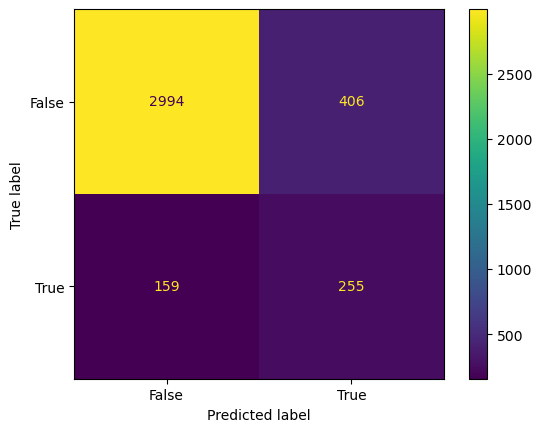

In [45]:
ConfusionMatrixDisplay(confusion_matrix(y, model.predict(X)), display_labels = [False, True]).plot()
plt.show()

## Naivni Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [42]:
model.fit(X,y)

GaussianNB()

In [43]:
print_performance(y, model.predict(X))

Accuracy: 0.8518615626638699
Precision: 0.3857791225416036
Recall: 0.6159420289855072
F1: 0.47441860465116287


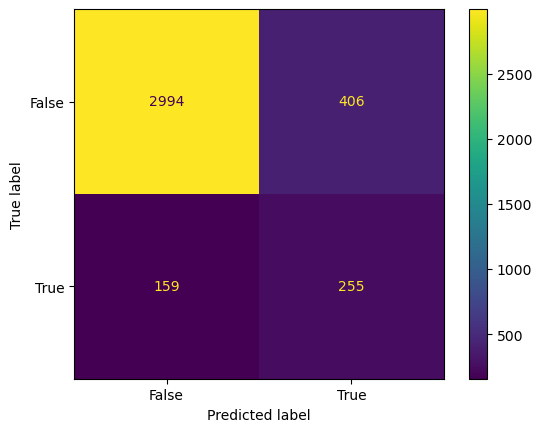

In [46]:
ConfusionMatrixDisplay(confusion_matrix(y, model.predict(X)), display_labels = [False, True]).plot()
plt.show()

## KNN klasifikacija

In [47]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [48]:
model.fit(X, y)

KNeighborsClassifier()

In [49]:
print_performance(y, model.predict(X))

Accuracy: 0.9268484530676455
Precision: 0.7051671732522796
Recall: 0.5603864734299517
F1: 0.6244952893674294


D:\Programi\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


D:\Programi\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


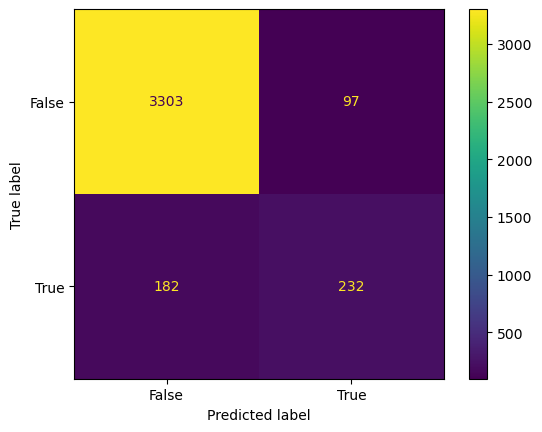

In [50]:
ConfusionMatrixDisplay(confusion_matrix(y, model.predict(X)), display_labels = [False, True]).plot()
plt.show()

## Stablo odlučivanja

In [51]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [52]:
model.fit(X, y)

DecisionTreeClassifier()

In [53]:
print_performance(y, model.predict(X))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


## Zaključak 1

Bez definisanja ikakvih parametara (osim kod logističke regresije, jer je izbacivalo grešku) dobijamo sledeće zaključke:
* Kod logističke regresije se dobija bolji CA nego kod trivijalnog modela, što nije loše. Preciznost je 67% što nije mnogo loše, ali odziv je vrlo nizak. U ovom slučaju više ćemo vrednovati odziv nego preciznost, jer nam je bitnije da što manje korsnika koji su zapravo uplatili depozit proglasimo onima koji nisu, nego da proglasimo korisnike koji nisu uplatili depozit za one koji jesu.
* Kod naivnog Bayes-a smo dobili nižu vrednost CA u odnosu na trivijalnu što nije dobro, ali smo zato dobili višu vrednost odziva u odnosu na logističku regresiju, Sa druge strane preciznost je dosta niža nego što je bila.
* Kod KNN algoritma smo dobili zaista fine rezultate svuda, iako je vrednost odziva manja od preciznosti, ovaj alogritam je u opštem slučaju mnogo bolje odradio klasifikaciju nego prethodna dva.
* Dolazimo do stabla odlučivanja koje je dobilo perfektne rezultate. Ovo je primer pretreniranosti modela. Pošto nismo definisali maksimalnu dubinu stabla, ono se pružilo do krajnjih tačaka gde je klasifikaciju odradilo za svaki objekat posebno, pa samim tim ne postoji greška. Kako bismo sprečili ovo, kasnije ćemo uvesti ograničenja za dubinu stabla i proveriti kakvi su rezultati dobijeni onda.

In [54]:
# odvoji train i test set